# Biolord Datasets

from `https://github.com/nitzanlab/biolord_reproducibility`

```bash
wget https://figshare.com/ndownloader/files/39756463 -O norman_biolord.h5ad;
wget https://figshare.com/ndownloader/files/39756733 -O norman_single_biolord.h5ad;
wget https://figshare.com/ndownloader/files/39375713 -O adata_infected.h5ad;
wget https://figshare.com/ndownloader/files/39375752 -O adata_abortive.h5ad;
wget https://figshare.com/ndownloader/files/39756736 -O adamson_single_biolord.h5ad;
wget https://figshare.com/ndownloader/files/39756439 -O adamson_biolord.h5ad;
wget https://f003.backblazeb2.com/file/chemCPA-datasets/sciplex_complete_middle_subset.h5ad -O sciplex_complete_middle_subset.h5ad;
wget https://figshare.com/ndownloader/files/39324305 -O sciplex3_biolord.h5ad;
```

In [1]:
1

1

In [2]:
import copy
import gc
import os
import sys
import pandas as pd
import warnings

import anndata as ad
import scanpy as sc
from scanpy.preprocessing._highly_variable_genes import highly_variable_genes

sys.path.append("/home/icb/kemal.inecik/work/codes/tardis")
from tardis._utils.preprocessing import (  # noqa
    NA_CELL_TYPE_PLACEHOLDER,
    RANK_GENES_GROUPS_KEY,
    calculate_de_genes,
    deep_memory_usage,
    select_hvgs,
)

sc.settings.verbosity = 3

In [3]:
download_directory = "/home/icb/kemal.inecik/lustre_workspace/downloaded_data"

biolord_datasets = [
    "norman_biolord",
    "norman_single_biolord",
    "adata_infected",
    "adata_abortive",
    "adamson_single_biolord",
    "adamson_biolord",
    "sciplex_complete_middle_subset",
    "sciplex3_biolord",
]

In [4]:
adata = dict()
for dataset_handle in biolord_datasets:
    try:
        adata[dataset_handle] = ad.read_h5ad(os.path.join(download_directory, dataset_handle + ".h5ad"))
    except:
        print("failed", dataset_handle)

## Afriat (Liver) Dataset

In [5]:
print(adata["adata_infected"].obs.columns)
adata["adata_infected"].obs

Index(['barcode', 'mouse', 'marker', 'time', 'infected', 'experiment',
       'coarse_time', 'MB', 'eta', 'n_genes_by_counts', 'total_counts',
       'total_counts_mt', 'pct_counts_mt', 'mt_qc', 'SUMPBA', 'n_counts',
       'n_genes', 'mus_rRNA', 'pba_rRNA', 'pba_rRNA_fraction', 'nCount_PBA',
       'nFeature_PBA', 'nCount_MUS', 'nFeature_MUS', 'RNA_snn_res.0.2',
       'seurat_clusters', 'MBinfected', 'cluster_names', 'ident',
       'eta_normalized', 'nCounts_tot', 'normalized_PBA', 'coarse_time_orig',
       'zone', 'status', 'status_control', 'time_int', 'split_random'],
      dtype='object')


,barcode,mouse,marker,time,infected,experiment,coarse_time,MB,eta,n_genes_by_counts,...,ident,eta_normalized,nCounts_tot,normalized_PBA,coarse_time_orig,zone,status,status_control,time_int,split_random
AACCTTG_IMM-feb20_M10_P29_24hpi,AACCTTG,M10,M10P29,24hpi,TRUE,IMM-feb20,24 hpi,Injection,0.568883,4838,...,Late Infection,0.390776,14902.395801,0.307871,24hpi,Pericentral,infected,Infected,24.0,train
AAGACTC_IMM-feb20_M10_P29_24hpi,AAGACTC,M10,M10P29,24hpi,TRUE,IMM-feb20,24 hpi,Injection,0.718165,3156,...,Late Infection,0.601731,7379.562481,0.321392,24hpi,Periportal,infected,Infected,24.0,train
AAGGCTA_IMM-feb20_M10_P29_24hpi,AAGGCTA,M10,M10P29,24hpi,TRUE,IMM-feb20,24 hpi,Injection,0.690969,1743,...,Late Infection,0.563299,2740.968744,0.551132,24hpi,Periportal,infected,Infected,24.0,train
AATGCCG_IMM-feb20_M10_P29_24hpi,AATGCCG,M10,M10P29,24hpi,TRUE,IMM-feb20,24 hpi,Injection,0.604646,3619,...,Late Infection,0.441315,9655.333335,0.160283,24hpi,Pericentral,infected,Infected,24.0,test
ACAATCG_IMM-feb20_M10_P29_24hpi,ACAATCG,M10,M10P29,24hpi,TRUE,IMM-feb20,24 hpi,Injection,0.851713,2375,...,Late Infection,0.790451,4602.750007,0.498932,24hpi,Periportal,infected,Infected,24.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCCTGA_IMM-Jan22_M24_P24_NI,TTCCTGA,M24,M24P24,NI,FALSE,IMM-Jan22,Control,Injection,0.718924,3191,...,Paired cells/Residuals,0.602804,11071.726533,0.000256,NI,Periportal,uninfected,Control,0.0,test
TTGCACC_IMM-Jan22_M24_P24_NI,TTGCACC,M24,M24P24,NI,FALSE,IMM-Jan22,Control,Injection,0.675071,2175,...,Pericentral-LOW stress,0.540834,6491.310340,0.000000,NI,Periportal,uninfected,Control,0.0,test
TTGCAGA_IMM-Jan22_M24_P24_NI,TTGCAGA,M24,M24P24,NI,FALSE,IMM-Jan22,Control,Injection,0.772547,3043,...,Pericentral-LOW stress,0.678581,11730.758672,0.000000,NI,Periportal,uninfected,Control,0.0,train
TTGCCTA_IMM-Jan22_M24_P24_NI,TTGCCTA,M24,M24P24,NI,FALSE,IMM-Jan22,Control,Injection,0.749358,3792,...,Periportal-HIGH stress,0.645811,15125.965590,0.000066,NI,Periportal,uninfected,Control,0.0,test


In [6]:
adata["adata_infected"].obs["status_control"].unique()

['Infected', 'Uninfected', 'Control']
Categories (3, object): ['Control', 'Infected', 'Uninfected']

In [7]:
adata["adata_infected"].obs["zone"].unique()

['Pericentral', 'Periportal']
Categories (2, object): ['Pericentral', 'Periportal']

In [8]:
adata["adata_infected"].obs["time_int"].unique()

array([24., 12., 36.,  2., 30.,  0.])

/home/icb/kemal.inecik/tools/apps/mamba/envs/tardis_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/kemal.inecik/tools/apps/mamba/envs/tardis_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/kemal.inecik/tools/apps/mamba/envs/tardis_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/kemal.inecik/tools/apps/mamba/envs/tardis_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


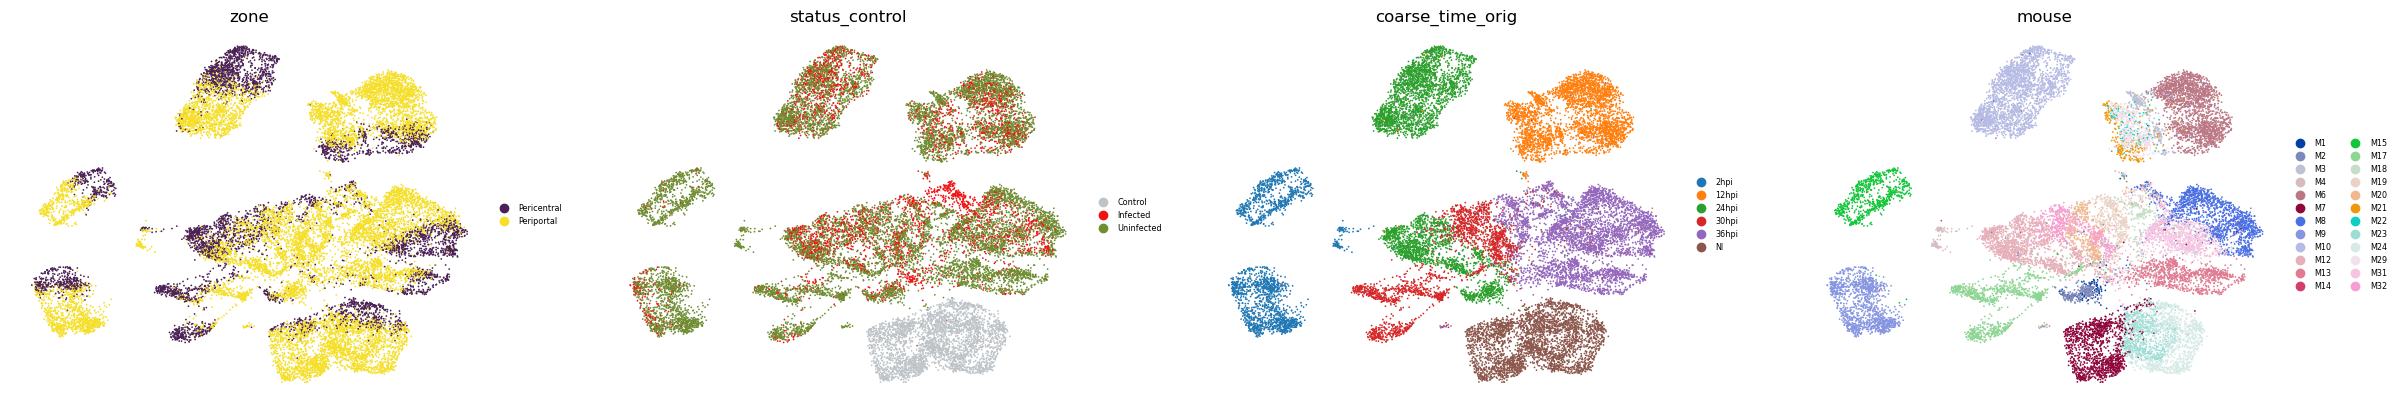

In [9]:
sc.pl.umap(
    adata["adata_infected"],
    color=["zone", "status_control", "coarse_time_orig", "mouse"],
    ncols=4,
    frameon=False,
    legend_fontsize="xx-small",
)

In [10]:
_adata = ad.AnnData(X=adata["adata_infected"].layers["counts"], obs=adata["adata_infected"].obs, var=adata["adata_infected"].var)
_adata = _adata[:, _adata.var["highly_variable"]]
_adata.var = pd.DataFrame(index=_adata.var.index)
_adata

AnnData object with n_obs × n_vars = 19053 × 5000
    obs: 'barcode', 'mouse', 'marker', 'time', 'infected', 'experiment', 'coarse_time', 'MB', 'eta', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'mt_qc', 'SUMPBA', 'n_counts', 'n_genes', 'mus_rRNA', 'pba_rRNA', 'pba_rRNA_fraction', 'nCount_PBA', 'nFeature_PBA', 'nCount_MUS', 'nFeature_MUS', 'RNA_snn_res.0.2', 'seurat_clusters', 'MBinfected', 'cluster_names', 'ident', 'eta_normalized', 'nCounts_tot', 'normalized_PBA', 'coarse_time_orig', 'zone', 'status', 'status_control', 'time_int', 'split_random'

In [11]:
with pd.option_context('display.max_rows', None):
    k = _adata.obs.groupby(["time_int", "zone", "status_control"]).size()
    display(k[k!=0])

time_int  zone         status_control
0.0       Pericentral  Control            546
          Periportal   Control           2659
2.0       Pericentral  Infected            69
                       Uninfected         587
          Periportal   Infected           122
                       Uninfected        1330
12.0      Pericentral  Infected           179
                       Uninfected         408
          Periportal   Infected           715
                       Uninfected        1900
24.0      Pericentral  Infected           760
                       Uninfected        1117
          Periportal   Infected           692
                       Uninfected        1721
30.0      Pericentral  Infected           182
                       Uninfected         597
          Periportal   Infected           307
                       Uninfected         963
36.0      Pericentral  Infected           364
                       Uninfected         775
          Periportal   Infected           

In [12]:
with pd.option_context('display.max_rows', None):
    k = _adata.obs.groupby(["mouse", "experiment"]).size()
    display(k[k!=0])

mouse  experiment
M1     IMM-nov18      111
M2     IMM-nov18      240
M3     IMM-nov18      291
M4     IMM-nov18       96
M6     IMM-feb20     2045
M7     IMM-feb20     1311
M8     IMM-feb20     1495
M9     IMM-feb20     1284
M10    IMM-feb20     2409
M12    IMM-feb20     1530
M13    IMM-aug20      989
M14    IMM-aug20        8
M15    IMM-aug20      720
M17    IMM-aug20     1013
M18    IMM-Dec21      239
M19    IMM-Dec21      529
M20    IMM-Dec21      490
M21    IMM-Dec21      254
M22    IMM-Dec21      145
M23    IMM-Dec21      896
M24    IMM-Jan22      998
M29    IMM-Jan22      467
M31    IMM-Jan22      947
M32    IMM-Jan22      546
dtype: int64

In [13]:
with pd.option_context('display.max_rows', None):
    k = _adata.obs.groupby(["experiment", "time_int", "zone", "status_control", "mouse"]).size()
    display(k[k!=0])

experiment  time_int  zone         status_control  mouse
IMM-Dec21   0.0       Pericentral  Control         M23       106
                      Periportal   Control         M23       790
            12.0      Pericentral  Infected        M21        23
                                                   M22         5
                                   Uninfected      M21       102
                                                   M22         3
                      Periportal   Infected        M21        39
                                                   M22        42
                                   Uninfected      M21        90
                                                   M22        95
            30.0      Pericentral  Infected        M20        20
                                   Uninfected      M20        52
                      Periportal   Infected        M20       111
                                   Uninfected      M20       307
            36.0      Pericentral

No batch key, as biolord also didn't use.

https://github.com/nitzanlab/biolord_reproducibility/blob/main/notebooks/spatio-temporal-infection/2_spatio-temporal-infection_state.ipynb



In [14]:
_adata.obs["time_cat"] = _adata.obs["time_int"].astype(str).astype("category")
_adata.obs = _adata.obs[["mouse", "experiment", "time_int", "time_cat", "zone", "status_control"]]

In [15]:
_adata.write("/lustre/groups/ml01/workspace/kemal.inecik/tardis_data/processed/biolord_afriat.h5ad")

In [16]:
!ls -lah /lustre/groups/ml01/workspace/kemal.inecik/tardis_data/processed

total 31G
drwxr-xr-x. 2 kemal.inecik OG-ICB-User 4.0K Apr 29 22:54 .
drwxr-xr-x. 6 kemal.inecik OG-ICB-User 4.0K Apr 25 12:40 ..
-rw-r--r--. 1 kemal.inecik OG-ICB-User 366M Apr 29 23:12 biolord_afriat.h5ad
-rw-r--r--. 1 kemal.inecik OG-ICB-User 171M Apr 18 13:43 cpa_GSM_new.h5ad
-rw-r--r--. 1 kemal.inecik OG-ICB-User 529M Apr 18 13:44 cpa_kang.h5ad
-rw-r--r--. 1 kemal.inecik OG-ICB-User 725M Apr 18 13:45 cpa_Norman2019_prep_new.h5ad
-rw-r--r--. 1 kemal.inecik OG-ICB-User 2.8G Apr 24 13:55 dataset_complete_Braun.h5ad
-rw-r--r--. 1 kemal.inecik OG-ICB-User 396K Apr 26 15:46 dataset_complete_Braun_varnames.pickle
-rw-r--r--. 1 kemal.inecik OG-ICB-User  47M Apr 23 09:53 dataset_complete_Calvanese.h5ad
-rw-r--r--. 1 kemal.inecik OG-ICB-User 397K Apr 26 16:01 dataset_complete_Calvanese_varnames.pickle
-rw-r--r--. 1 kemal.inecik OG-ICB-User 252M Apr 23 09:51 dataset_complete_Colin.h5ad
-rw-r--r--. 1 kemal.inecik OG-ICB-User 398K Apr 26 16:00 dataset_complete_Colin_varnames.pickle
-rw-r--r--. 

In [17]:
adata["adata_infected"]

AnnData object with n_obs × n_vars = 19053 × 8203
    obs: 'barcode', 'mouse', 'marker', 'time', 'infected', 'experiment', 'coarse_time', 'MB', 'eta', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'mt_qc', 'SUMPBA', 'n_counts', 'n_genes', 'mus_rRNA', 'pba_rRNA', 'pba_rRNA_fraction', 'nCount_PBA', 'nFeature_PBA', 'nCount_MUS', 'nFeature_MUS', 'RNA_snn_res.0.2', 'seurat_clusters', 'MBinfected', 'cluster_names', 'ident', 'eta_normalized', 'nCounts_tot', 'normalized_PBA', 'coarse_time_orig', 'zone', 'status', 'status_control', 'time_int', 'split_random'
    var: 'org', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'coarse_time_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'status_colors', 'status_control_colors', 'umap', 'zone_colors', 'coarse_time_orig_colors', 'mouse_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'logcounts', 'scaledata'
    obsp: 'connectivities', 'distances'

In [18]:
import numpy as np

In [19]:
k = (_adata.X.astype(int) != _adata.X) & (_adata.X != 0.0)
l = (_adata.X.astype(int) == _adata.X) & (_adata.X != 0.0)

In [20]:
k.sum(), l.sum()

(9754421, 10843182)

In [21]:
_adata.X[l]

array([2., 1., 1., ..., 1., 2., 1.], dtype=float32)

In [22]:
_adata.X[k]

array([1.9166666, 2.8333333, 1.9583334, ..., 4.827586 , 0.9655172,
       1.9655173], dtype=float32)

In [23]:
0

0